In [1]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"

import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os.path import join

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [2]:
_celltype = ['Mono-CD14-HLA','Mono-CD14-S100A8-RETN','Mono−CD16', 'Mono-CD14-S100A8-CD163',
             'Mono-CD14-CCL3','Mono-CD14-CD16', 'Mono-CD14-IFITM3']

anndata = sc.read_h5ad('data/pbmc.virus.refine.DEpart.h5ad')
anndata_filtered = anndata[anndata.obs.louvain_celltype.isin(_celltype),:]

## MS1 markers score

In [3]:
MS1_geneList = ['RETN', 'CD63', 'ALOX5AP', 'SEC61G', 'TXN','MT1X']
sc.tl.score_genes(anndata_filtered, gene_list=MS1_geneList, score_name='MS1.score')

Trying to set attribute `.obs` of view, copying.


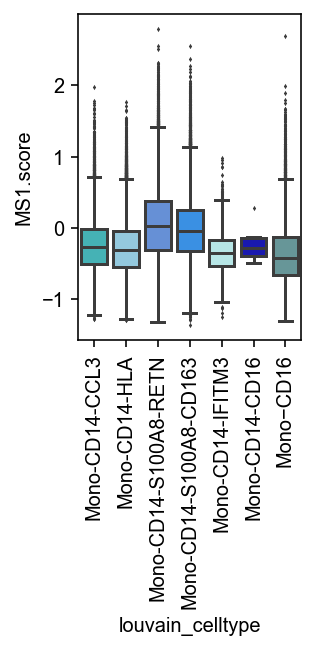

In [10]:
meta = anndata_filtered.obs.copy()
palette_1 = ['#32c3c8','#87ceeb', '#538be9', '#1e90ff', '#afeeee', '#0000C8', '#5f9ea0']

fig, ax = plt.subplots(figsize=(2, 3))
sns.boxplot(y='MS1.score', x='louvain_celltype', data=meta, fliersize=0.5, ax=ax, palette=palette_1)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('./figures/MS1.score.MS1Markers.pdf', dpi=600)

In [12]:
from scipy.stats import mannwhitneyu
def mannwhitneyu_test(score_meta, path=None):
    """
    单边检验
    """
    result = []
    for _celltype in score_meta.louvain_celltype.unique().tolist():
        exp_group = score_meta[score_meta.louvain_celltype==_celltype]
        ctrl_group = score_meta[score_meta.louvain_celltype!=_celltype]
        
        _, _pval1 = mannwhitneyu(exp_group['MS1.score'], ctrl_group['MS1.score'],alternative='greater')
        result.append([_celltype, _pval1])
    PVAL_df = pd.DataFrame(result, columns=['celltype', 'pvalue'])
    if path:
        PVAL_df.to_csv(path)
    else:
        return PVAL_df

mannwhitneyu_test(meta, path='./figures/MS1.score.MS1Markers.csv')

In [13]:
meta_filtered = meta[meta.louvain_celltype.isin(['Mono-CD14-S100A8-RETN', 'Mono-CD14-S100A8-CD163'])]
meta_filtered.louvain_celltype = meta_filtered.louvain_celltype.cat.remove_unused_categories()

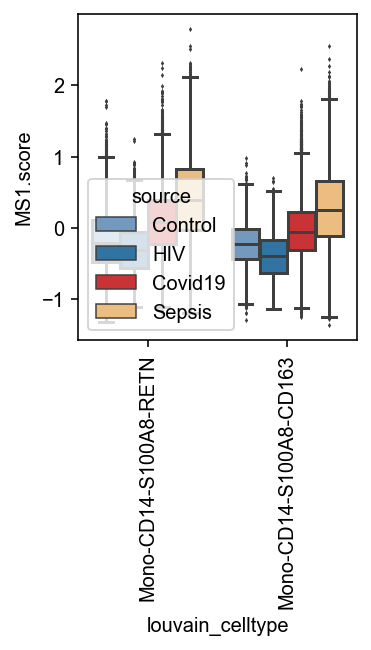

In [14]:
fig, ax = plt.subplots(figsize=(2.5, 3))
sns.boxplot(y='MS1.score', x='louvain_celltype', data=meta_filtered,hue='source', fliersize=0.5, ax=ax,
            hue_order=['Control', 'HIV', 'Covid19', 'Sepsis'], palette=['#6699CC','#1f78b4','#e31a1c','#fdbf6f'])
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.savefig('./figures/MS1.score.twoCluster.pdf', dpi=600)

In [ ]:
from scipy.stats import ranksums
result = []
for _celltype in ['Mono-CD14-S100A8-RETN', 'Mono-CD14-S100A8-CD163']:
    tmp_meta =  meta_filtered[meta_filtered.louvain_celltype==_celltype]
    ctrl_group = tmp_meta[tmp_meta.source=='Control']['MS1.score'].values
    for condition in meta_filtered.source.unique():
        if condition == 'Control':
            continue
        exp_group = tmp_meta[tmp_meta.source==condition]['MS1.score'].values
        _stat, _pval = ranksums(exp_group, ctrl_group)
        result.append([_celltype, condition, _stat, _pval])

pd.DataFrame(result, columns=['celltype','Disease.Vs.Ctrl', 'stat', 'pvalue'])

In [ ]:
from scipy.stats import ranksums
result = []
for _celltype in ['Mono-CD14-S100A8-RETN', 'Mono-CD14-S100A8-CD163']:
    tmp_meta =  meta_filtered[meta_filtered.louvain_celltype==_celltype]
    ctrl_group = tmp_meta[tmp_meta.source=='Covid19']['MS1.score'].values
    for condition in meta_filtered.source.unique():
        if condition == 'Covid19':
            continue
        exp_group = tmp_meta[tmp_meta.source==condition]['MS1.score'].values
        _stat, _pval = ranksums(exp_group, ctrl_group)
        result.append([_celltype, condition, _stat, _pval])

pd.DataFrame(result, columns=['celltype','Disease.Vs.Ctrl', 'stat', 'pvalue'])

## MS1 low-expression markers

In [16]:
MS1_geneList2 = ['HLA-DRA', 'HLA-DRB1','HLA-DPA1','HLA-DPB1','HLA-DQA1','HLA-DQB1']
sc.tl.score_genes(anndata_filtered, gene_list=MS1_geneList2, score_name='MS1.MHCII.score')

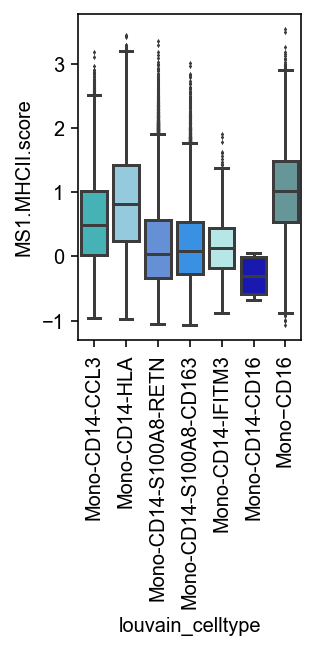

In [18]:
meta = anndata_filtered.obs.copy()

fig, ax = plt.subplots(figsize=(2, 3))
sns.boxplot(y='MS1.MHCII.score', x='louvain_celltype', data=meta, fliersize=.5, ax=ax, palette=palette_1)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('./figures/MS1.score.HLA-DR.pdf', dpi=600)

In [19]:
from scipy.stats import mannwhitneyu
def mannwhitneyu_test(score_meta, path=None):
    """
    单边检验
    """
    result = []
    for _celltype in score_meta.louvain_celltype.unique().tolist():
        exp_group = score_meta[score_meta.louvain_celltype==_celltype]
        ctrl_group = score_meta[score_meta.louvain_celltype!=_celltype]
        
        _, _pval1 = mannwhitneyu(exp_group['MS1.MHCII.score'], ctrl_group['MS1.MHCII.score'],alternative='less')
        result.append([_celltype, _pval1])
    PVAL_df = pd.DataFrame(result, columns=['celltype', 'pvalue'])
    if path:
        PVAL_df.to_csv(path)
    else:
        return PVAL_df

mannwhitneyu_test(meta
                  , path='./figures/MS1.score.HLA-DR.csv'
                 )